In [136]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.linear_model import LogisticRegression
import plotly.express as px
from sklearn.metrics import accuracy_score, confusion_matrix
from sklearn.model_selection import train_test_split

In [92]:
df = pd.read_csv('turnover.csv', encoding='ISO-8859-1')


In [93]:
df

,stag,event,gender,age,industry,profession,traffic,coach,head_gender,greywage,way,extraversion,independ,selfcontrol,anxiety,novator
0,7.030801,1,m,35.0,Banks,HR,rabrecNErab,no,f,white,bus,6.2,4.1,5.7,7.1,8.3
1,22.965092,1,m,33.0,Banks,HR,empjs,no,m,white,bus,6.2,4.1,5.7,7.1,8.3
2,15.934292,1,f,35.0,PowerGeneration,HR,rabrecNErab,no,m,white,bus,6.2,6.2,2.6,4.8,8.3
3,15.934292,1,f,35.0,PowerGeneration,HR,rabrecNErab,no,m,white,bus,5.4,7.6,4.9,2.5,6.7
4,8.410678,1,m,32.0,Retail,Commercial,youjs,yes,f,white,bus,3.0,4.1,8.0,7.1,3.7
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1124,10.611910,0,f,41.0,Banks,HR,rabrecNErab,my head,m,white,bus,8.6,3.4,2.6,4.8,8.3
1125,10.611910,0,f,41.0,Banks,HR,rabrecNErab,my head,m,white,bus,8.6,3.4,2.6,4.8,8.3
1126,118.800821,0,f,34.0,Telecom,Accounting,KA,no,f,white,bus,4.6,5.5,7.2,6.3,3.7
1127,49.412731,0,f,51.0,Consult,HR,empjs,no,m,grey,bus,3.8,7.6,5.7,6.3,5.2


In [94]:
df.shape

(1129, 16)

### Data Exploration and pre processing

In [95]:
df.isnull().sum().sum()

0

In [96]:
df.dtypes

stag            float64
event             int64
gender           object
age             float64
industry         object
profession       object
traffic          object
coach            object
head_gender      object
greywage         object
way              object
extraversion    float64
independ        float64
selfcontrol     float64
anxiety         float64
novator         float64
dtype: object

In [97]:
#Checking for unique values in the categorical data features
for column in df.select_dtypes(include = 'object'):
    print(column.upper() + ': ', end = "") 
    print(*list(df[column].unique()), sep = "; ")

GENDER: m; f
INDUSTRY: Banks; PowerGeneration; Retail; manufacture; Consult; State; etc; Building; IT;  HoReCa; Telecom; Pharma; Mining; transport; Agriculture; RealEstate
PROFESSION: HR; Commercial; Marketing; etc; Sales; BusinessDevelopment; Finanñe; Teaching; manage; IT; Law; Consult; Engineer; PR; Accounting
TRAFFIC: rabrecNErab; empjs; youjs; referal; advert; KA; recNErab; friends
COACH: no; yes; my head
HEAD_GENDER: f; m
GREYWAGE: white; grey
WAY: bus; car; foot


In [98]:
# Renaming certain columns for better readability
df = df.rename(columns={'stag': 'tenure',
                        'event' : 'has_resigned',
                        'employee_pipelene ': 'employee_pipelene', 
                        'coach': 'is_trained',
                        'head_gender': 'supervisor_gender',
                        'way': 'commute',
                        })

In [103]:
# Encoding the categorical features into numerical values
from sklearn.preprocessing import LabelEncoder
print('Categorical columns: ')
for col in df.columns:
    if df[col].dtype == 'object':
        values = df[col].value_counts()
        values = dict(values)
        
        print(str(col))
        label = LabelEncoder()
        label = label.fit(df[col])
        df[col] = label.transform(df[col].astype(str))
        
        new_values = df[col].value_counts()
        new_values = dict(new_values)
        
        value_dict = {}
        i=0
        for key in values:
            value_dict[key] = list(new_values)[i]
            i+= 1
        print(value_dict)

Categorical columns: 
gender
{'f': 0, 'm': 1}
industry
{'Retail': 10, 'manufacture': 14, 'IT': 5, 'Banks': 2, 'etc': 13, 'Consult': 4, 'State': 11, 'Building': 3, 'PowerGeneration': 8, 'transport': 15, 'Telecom': 12, 'Mining': 6, 'Pharma': 7, 'Agriculture': 1, 'RealEstate': 9, ' HoReCa': 0}
profession
{'HR': 6, 'IT': 7, 'Sales': 11, 'etc': 13, 'Marketing': 9, 'BusinessDevelopment': 1, 'Consult': 3, 'Commercial': 2, 'manage': 14, 'Finanñe': 5, 'Engineer': 4, 'Teaching': 12, 'Accounting': 0, 'Law': 8, 'PR': 10}
traffic
{'youjs': 7, 'empjs': 2, 'rabrecNErab': 4, 'friends': 3, 'referal': 6, 'KA': 0, 'recNErab': 5, 'advert': 1}
is_trained
{'no': 1, 'my head': 0, 'yes': 2}
supervisor_gender
{'m': 1, 'f': 0}
greywage
{'white': 1, 'grey': 0}
commute
{'bus': 0, 'car': 1, 'foot': 2}


In [124]:
df.head(5)

,tenure,has_resigned,gender,age,industry,profession,traffic,is_trained,supervisor_gender,greywage,commute,extraversion,independ,selfcontrol,anxiety,novator
0,7.030801,1,1,35.0,2,6,4,1,0,1,0,6.2,4.1,5.7,7.1,8.3
1,22.965092,1,1,33.0,2,6,2,1,1,1,0,6.2,4.1,5.7,7.1,8.3
2,15.934292,1,0,35.0,8,6,4,1,1,1,0,6.2,6.2,2.6,4.8,8.3
3,15.934292,1,0,35.0,8,6,4,1,1,1,0,5.4,7.6,4.9,2.5,6.7
4,8.410678,1,1,32.0,10,2,7,2,0,1,0,3.0,4.1,8.0,7.1,3.7


### Data Visualization

#### Scatter plot

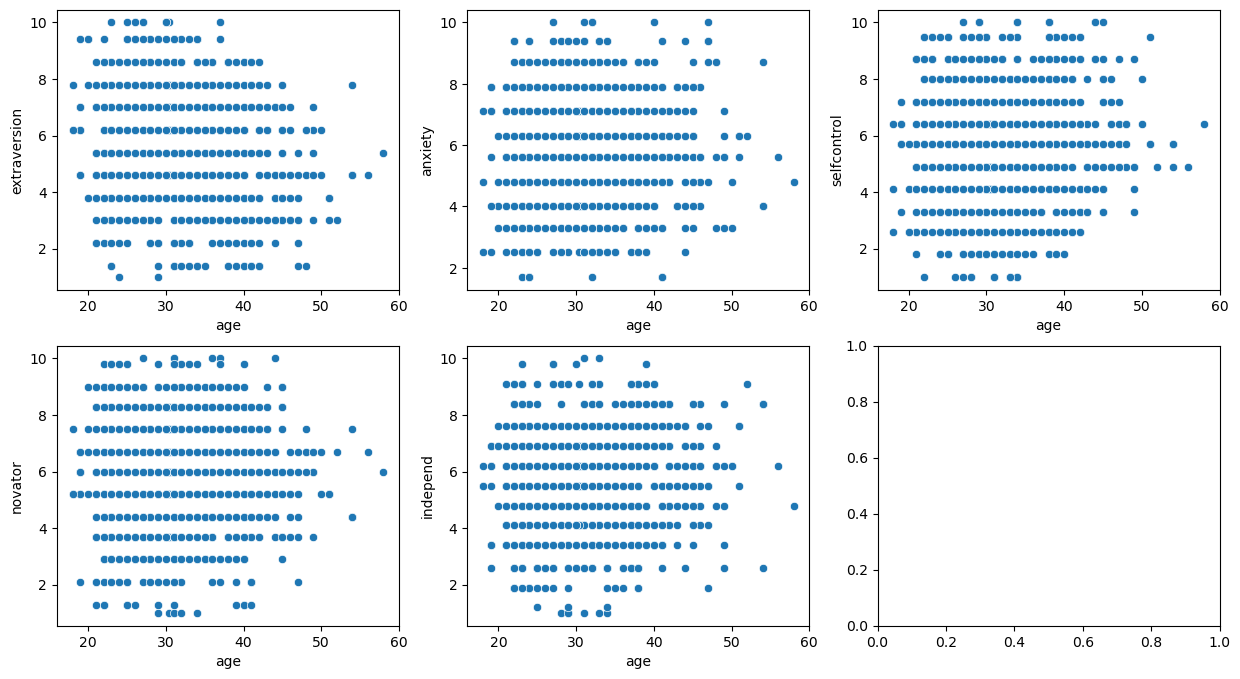

In [105]:
import matplotlib.pyplot as plt

fig, axs = plt.subplots(2, 3, figsize=(15, 8))
sns.scatterplot(x='age', y='extraversion', data=df, ax=axs[0][0])
sns.scatterplot(x='age', y='anxiety', data=df, ax=axs[0][1])
sns.scatterplot(x='age', y='selfcontrol', data=df, ax=axs[0][2])
sns.scatterplot(x='age', y='novator', data=df, ax=axs[1][0])
sns.scatterplot(x='age', y='independ', data=df, ax=axs[1][1])
plt.show()


#### Histogram

/var/folders/mb/vy7_jr9n7cq7n7n6_vl178740000gn/T/ipykernel_63453/3411951942.py:2: UserWarning: To output multiple subplots, the figure containing the passed axes is being cleared.
  df.hist(ax = ax);


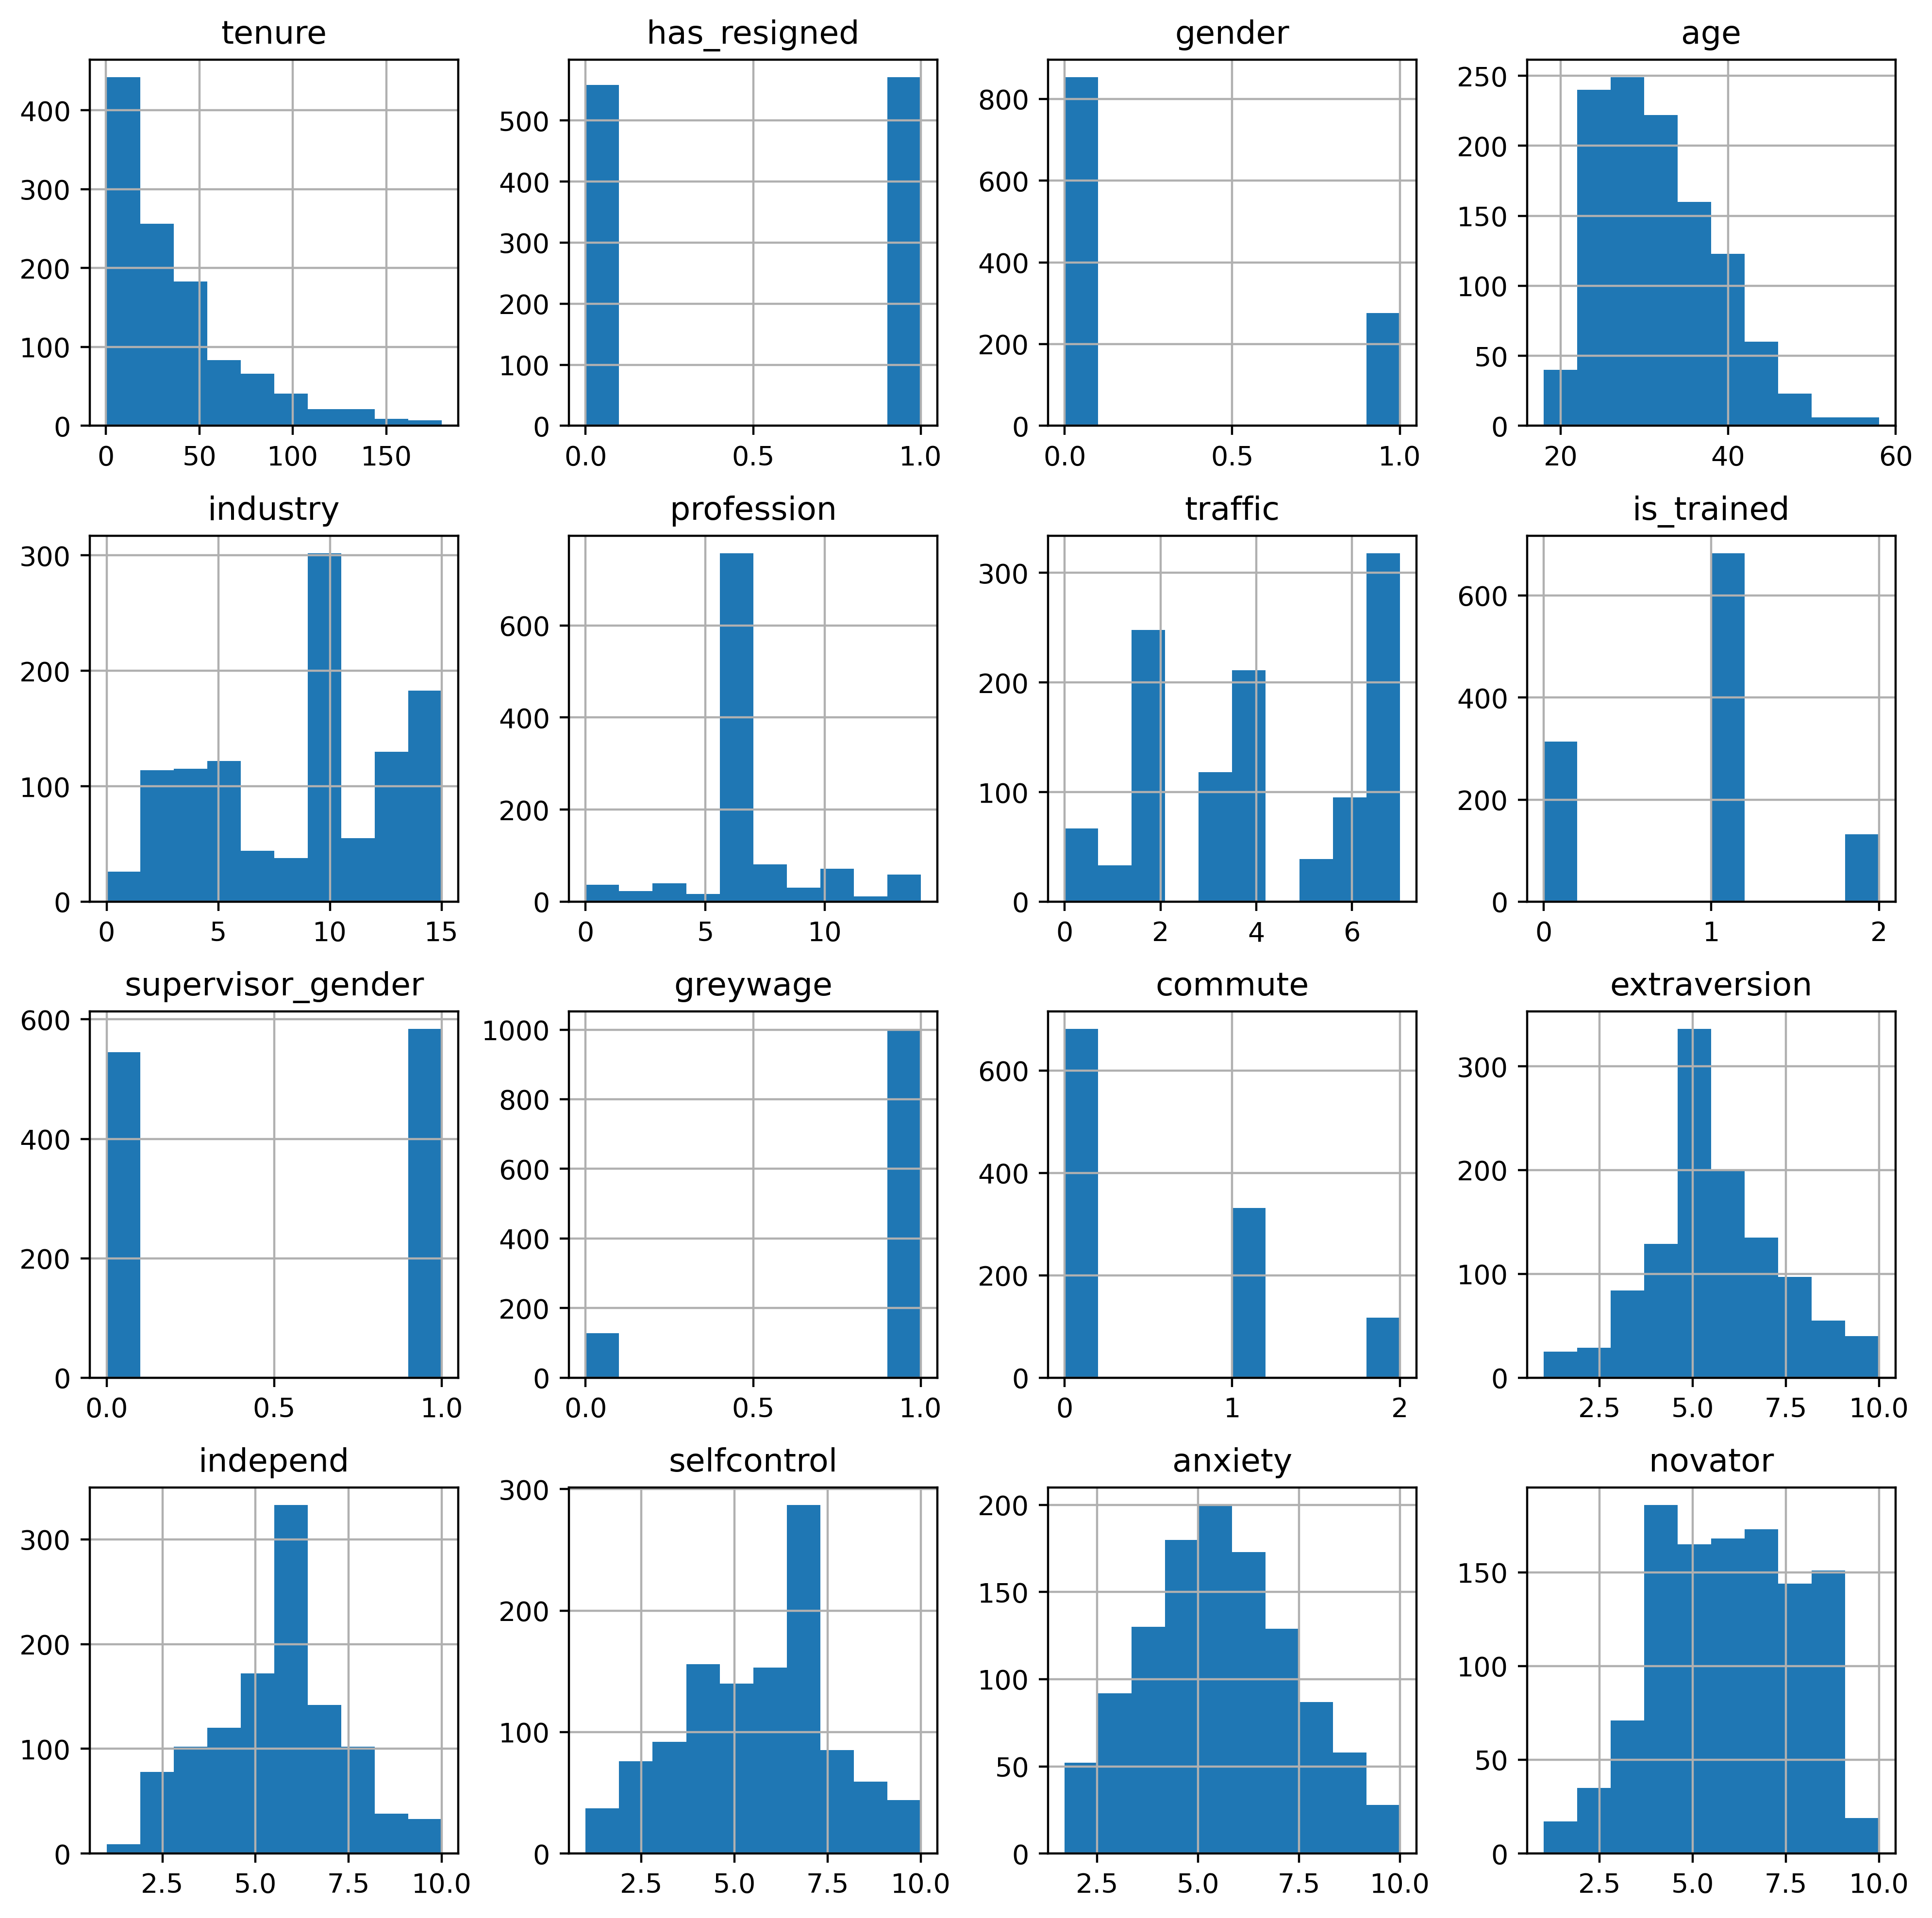

In [106]:
fig, ax = plt.subplots(figsize = (12, 12), dpi = 400)
df.hist(ax = ax);

#### Bar Chart:

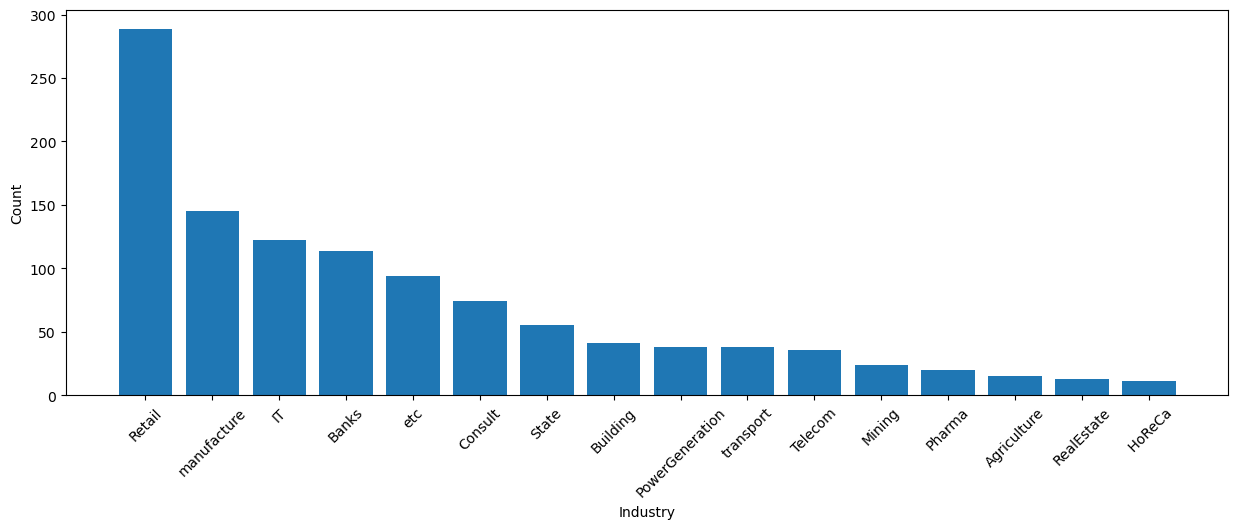

In [99]:
import matplotlib.pyplot as plt
plt.figure(figsize=(15, 5))
industry_counts = df["industry"].value_counts()
plt.bar(industry_counts.index, industry_counts.values)
plt.xlabel("Industry")
plt.ylabel("Count")
plt.xticks(rotation=45)
plt.show()


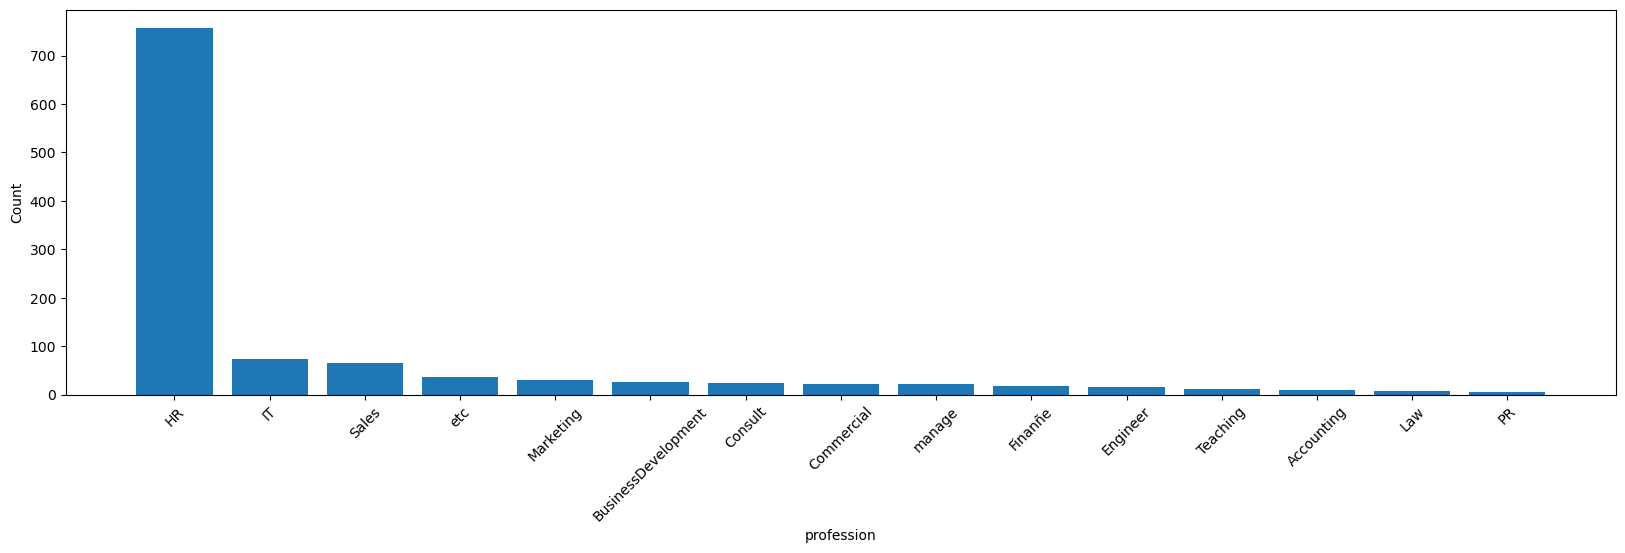

In [100]:
import matplotlib.pyplot as plt
plt.figure(figsize=(20, 5))
industry_counts = df["profession"].value_counts()
plt.bar(industry_counts.index, industry_counts.values)
plt.xlabel("profession")
plt.ylabel("Count")
plt.xticks(rotation=45)
plt.show()

#### Boxplot:

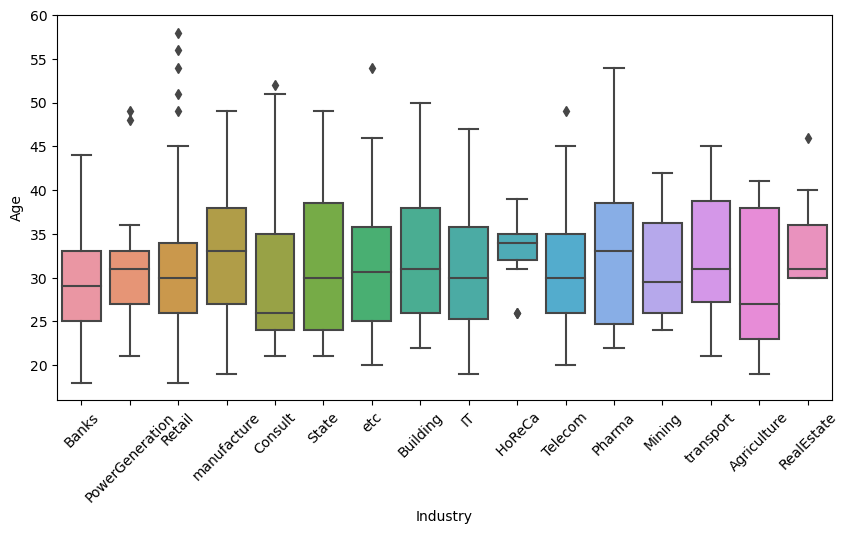

In [101]:
import seaborn as sns
plt.figure(figsize=(10, 5))
sns.boxplot(x="industry", y="age", data=df)
plt.xlabel("Industry")
plt.ylabel("Age")
plt.xticks(rotation=45)
plt.show()


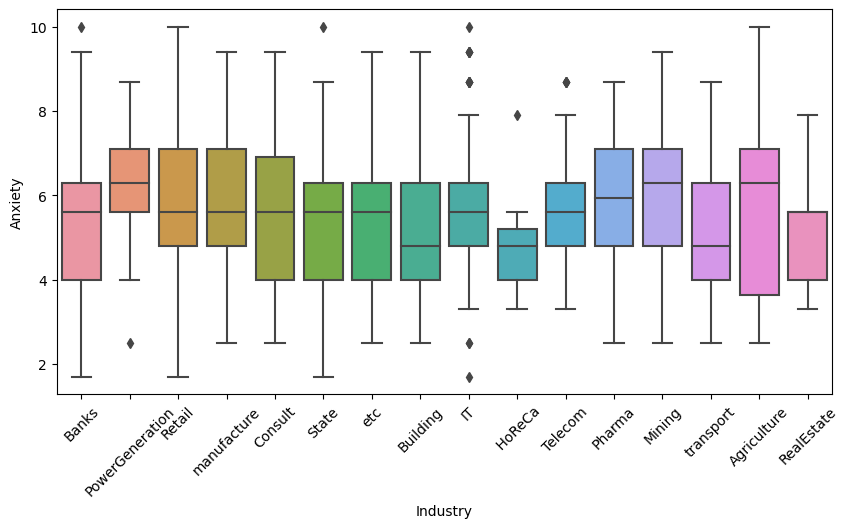

In [102]:
import seaborn as sns
plt.figure(figsize=(10, 5))
sns.boxplot(x="industry", y="anxiety", data=df)
plt.xlabel("Industry")
plt.ylabel("Anxiety")
plt.xticks(rotation=45)
plt.show()


##### Checking the featues impact on employee resignation

In [119]:
fig = px.histogram(df, x="tenure", color='has_resigned', marginal='box', barmode='group',color_discrete_sequence=['#00A950', '#EF553B'])
fig.show()

Based on the graph, it is evident that there is a weak correlation between experience (time) and employee resignations. Therefore, it can be concluded that experience (time) is not a significant factor in employees' decisions to resign.

In [120]:
fig = px.histogram(df, x="age", color='has_resigned', marginal='box', barmode='group', color_discrete_sequence=['#00A950', '#EF553B'])
fig.show()

As anticipated, age and experience (time) both lack strong correlations with employees resigning.

In [121]:
fig = px.histogram(df, x="industry", color='has_resigned', barmode='group',color_discrete_sequence=['#00A950', '#EF553B'])
fig.show()

In [123]:
fig = px.histogram(df, x="gender", color='has_resigned', barmode='group',color_discrete_sequence=['#00A950', '#EF553B'])
fig.show()

Upon analyzing the above graphs, it can be observed that all of them show weak correlation with employees resigning.

### Statistical Analysis

Correlation Analysis

In [125]:
#Seperating independent variables and the target variable
X = df.drop(columns=['has_resigned'])
y = df['has_resigned']

In [131]:
from scipy.stats import pearsonr

# Select only numerical columns
numerical_cols = df.select_dtypes(include=['int64', 'float64']).columns

# Calculate correlation coefficients and p-values for each numerical column
for col in numerical_cols:
    corr, p_value = pearsonr(df[col], df['has_resigned'])
    
    # Print results with formatted output
    print(f'{col.upper(): <15}: correlation={corr:.2f}\t p-value={p_value:.2f}')


TENURE         : correlation=-0.05	 p-value=0.10
HAS_RESIGNED   : correlation=1.00	 p-value=0.00
GENDER         : correlation=-0.02	 p-value=0.53
AGE            : correlation=-0.05	 p-value=0.10
INDUSTRY       : correlation=-0.06	 p-value=0.03
PROFESSION     : correlation=0.03	 p-value=0.27
TRAFFIC        : correlation=-0.02	 p-value=0.61
IS_TRAINED     : correlation=0.06	 p-value=0.03
SUPERVISOR_GENDER: correlation=0.04	 p-value=0.17
GREYWAGE       : correlation=-0.05	 p-value=0.10
COMMUTE        : correlation=-0.07	 p-value=0.02
EXTRAVERSION   : correlation=0.02	 p-value=0.60
INDEPEND       : correlation=0.05	 p-value=0.08
SELFCONTROL    : correlation=-0.04	 p-value=0.18
ANXIETY        : correlation=-0.06	 p-value=0.03
NOVATOR        : correlation=0.01	 p-value=0.82


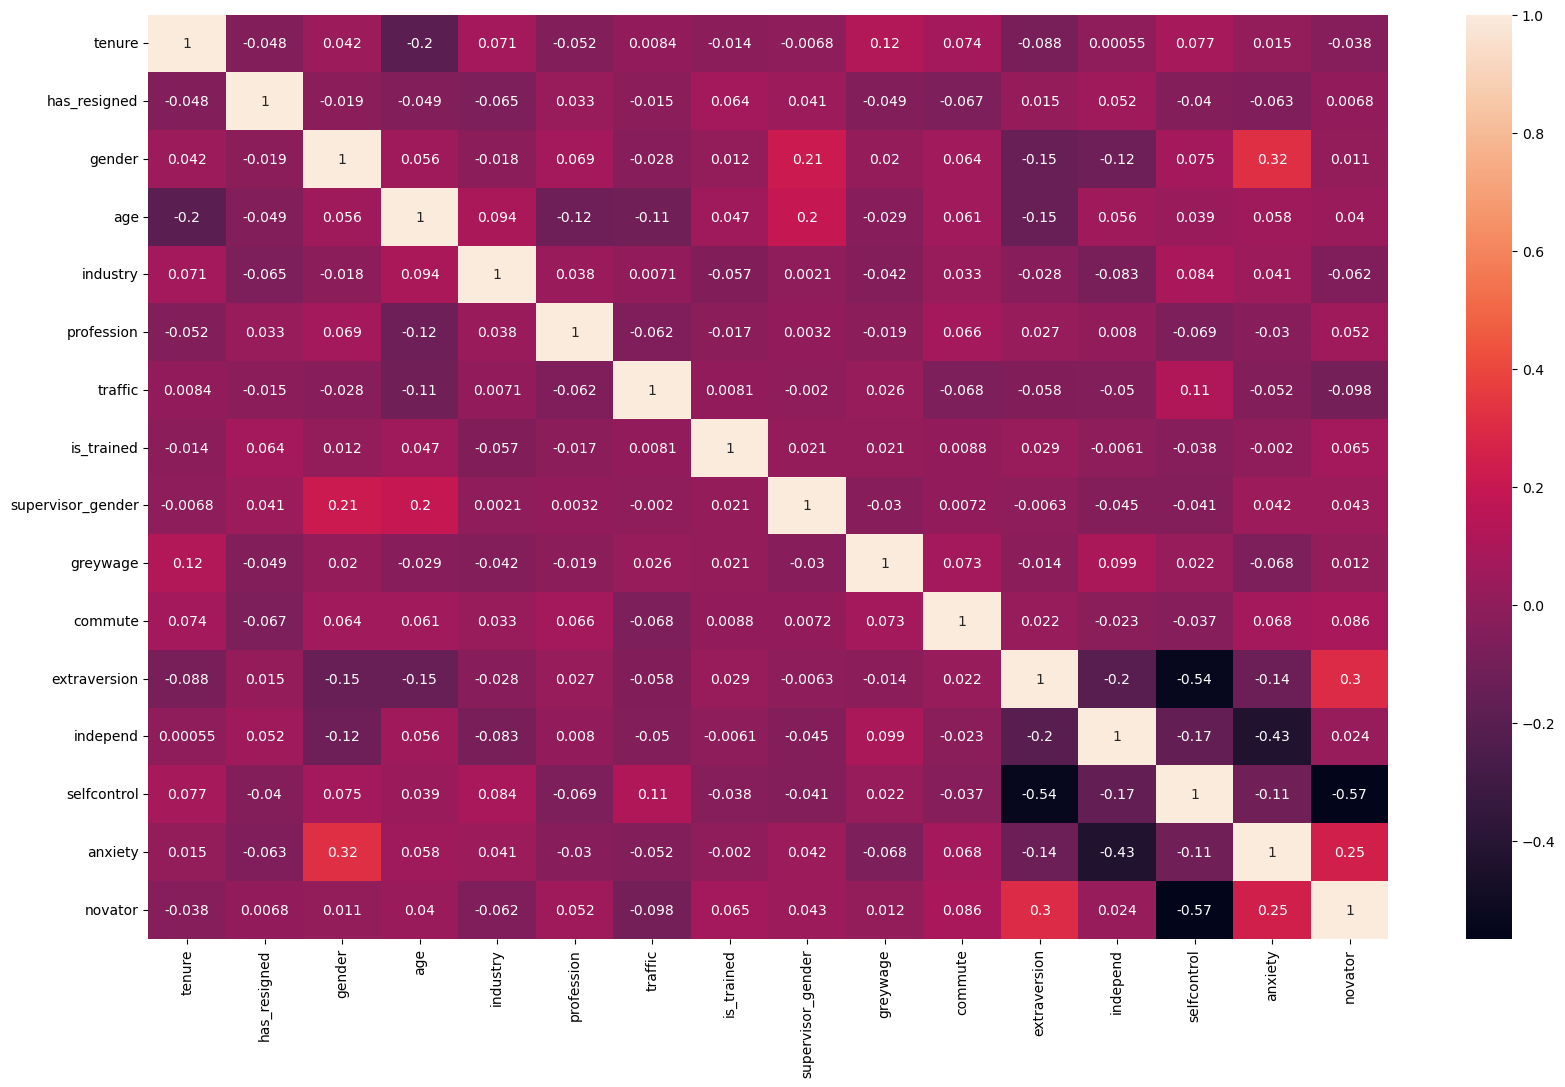

In [107]:
import seaborn as sns

plt.figure(figsize=(20, 12))
corr_matrix = df.corr()
sns.heatmap(corr_matrix, annot=True)
plt.show()


Relying solely on correlations is not effective in this case, as all columns have very weak or no linear correlation with the event. Therefore, extracting meaningful information through data visualization is limited unless there are other non-linear relationships within the data.

#### Mann-Whitney U test

for feature selection for the given dataset, the features are numeric and the target variable is binary. Mann-Whitney U test is a non-parametric test that can be used to compare two groups of independent samples, which makes it suitable for feature selection in binary classification problems where you want to compare the distribution of a continuous feature between the two classes. However, you need to make sure that the assumptions of the test are met, such as the independence of observations, the equality of variances between the groups, and the assumption of a continuous and symmetric distribution of the feature.

In [184]:
import pandas as pd
from scipy.stats import mannwhitneyu


# Perform the Mann-Whitney U test on each feature
for column in df.columns:
    # Ignore non-numeric columns
    if not pd.api.types.is_numeric_dtype(df[column]):
        continue
    
    # Split the data into two groups based on the target variable (assuming it's called "target")
    group1 = df[df["has_resigned"] == 0][column]
    group2 = df[df["has_resigned"] == 1][column]
    
    # Perform the Mann-Whitney U test and print the results
    stat, pval = mannwhitneyu(group1, group2)
    print(f"Feature: {column}\nMann-Whitney U stat: {stat:.4f}\np-value: {pval:.4f}\n")


Feature: tenure
Mann-Whitney U stat: 166356.5000
p-value: 0.1983

Feature: has_resigned
Mann-Whitney U stat: 0.0000
p-value: 0.0000

Feature: gender
Mann-Whitney U stat: 161899.5000
p-value: 0.5253

Feature: age
Mann-Whitney U stat: 169957.0000
p-value: 0.0517

Feature: industry
Mann-Whitney U stat: 170053.0000
p-value: 0.0473

Feature: profession
Mann-Whitney U stat: 160091.0000
p-value: 0.8644

Feature: traffic
Mann-Whitney U stat: 162448.5000
p-value: 0.5583

Feature: is_trained
Mann-Whitney U stat: 149068.0000
p-value: 0.0315

Feature: supervisor_gender
Mann-Whitney U stat: 152739.5000
p-value: 0.1659

Feature: greywage
Mann-Whitney U stat: 164259.0000
p-value: 0.0987

Feature: commute
Mann-Whitney U stat: 167779.0000
p-value: 0.0750

Feature: extraversion
Mann-Whitney U stat: 156601.0000
p-value: 0.6182

Feature: independ
Mann-Whitney U stat: 151822.0000
p-value: 0.1685

Feature: selfcontrol
Mann-Whitney U stat: 166359.5000
p-value: 0.1952

Feature: anxiety
Mann-Whitney U stat: 17

Chi-2 test

In [158]:
# Using SelectKBest and chi-squared test to select the top 5 features
from sklearn.feature_selection import SelectKBest
from sklearn.feature_selection import chi2

In [169]:
best_features = SelectKBest(score_func=chi2, k=5)
fit = best_features.fit(X, y)
X_selected = fit.transform(X)

# Print the top 5 features
print(X.columns[fit.get_support()])

Index(['tenure', 'age', 'industry', 'commute', 'anxiety'], dtype='object')


ANOVA

In [170]:
from scipy.stats import f_oneway

# Separate the dataset into two groups based on the target variable
group_0 = df[df['has_resigned'] == 0]
group_1 = df[df['has_resigned'] == 1]

# Perform ANOVA for each feature and store the p-values in a dictionary
p_values = {}
for column in df.columns:
    if column != 'has_resigned':
        _, p_value = f_oneway(group_0[column], group_1[column])
        p_values[column] = p_value

# Print the p-values in ascending order
for column, p_value in sorted(p_values.items(), key=lambda x: x[1]):
    print(f'{column}: {p_value:.4f}')


commute: 0.0234
industry: 0.0292
is_trained: 0.0308
anxiety: 0.0336
independ: 0.0815
greywage: 0.0987
age: 0.1016
tenure: 0.1044
supervisor_gender: 0.1659
selfcontrol: 0.1788
profession: 0.2675
gender: 0.5254
extraversion: 0.6039
traffic: 0.6128
novator: 0.8188


If we look at the first four features on the list (commute, industry, is_trained, anxiety), they all have p-values less than 0.05, our threshold for statistical significance.
This suggests that there may be a significant relationship between these features and the likelihood of an employee resigning.

#### Feature selection based on significant relationship between these features and the likelihood of an employee resigning

In [193]:
X

,tenure,gender,age,industry,profession,traffic,is_trained,supervisor_gender,greywage,commute,extraversion,independ,selfcontrol,anxiety,novator
0,7.030801,1,35.0,2,6,4,1,0,1,0,6.2,4.1,5.7,7.1,8.3
1,22.965092,1,33.0,2,6,2,1,1,1,0,6.2,4.1,5.7,7.1,8.3
2,15.934292,0,35.0,8,6,4,1,1,1,0,6.2,6.2,2.6,4.8,8.3
3,15.934292,0,35.0,8,6,4,1,1,1,0,5.4,7.6,4.9,2.5,6.7
4,8.410678,1,32.0,10,2,7,2,0,1,0,3.0,4.1,8.0,7.1,3.7
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1124,10.611910,0,41.0,2,6,4,0,1,1,0,8.6,3.4,2.6,4.8,8.3
1125,10.611910,0,41.0,2,6,4,0,1,1,0,8.6,3.4,2.6,4.8,8.3
1126,118.800821,0,34.0,12,0,0,1,0,1,0,4.6,5.5,7.2,6.3,3.7
1127,49.412731,0,51.0,4,6,2,1,1,0,0,3.8,7.6,5.7,6.3,5.2


In [194]:
selected_features = ['tenure', 'age', 'industry', 'is_trained', 'commute', 'anxiety']
X_selected_features = X[selected_features]
X_selected_features

,tenure,age,industry,is_trained,commute,anxiety
0,7.030801,35.0,2,1,0,7.1
1,22.965092,33.0,2,1,0,7.1
2,15.934292,35.0,8,1,0,4.8
3,15.934292,35.0,8,1,0,2.5
4,8.410678,32.0,10,2,0,7.1
...,...,...,...,...,...,...
1124,10.611910,41.0,2,0,0,4.8
1125,10.611910,41.0,2,0,0,4.8
1126,118.800821,34.0,12,1,0,6.3
1127,49.412731,51.0,4,1,0,6.3


### Model training

In [196]:
# Split data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X_selected_features, y, test_size=0.2, random_state=42)

Logistic Regression
Accuracy: 0.5486725663716814
Confusion matrix:
TN: 59 FP: 49
FN: 53 TP: 65


Decision Tree
Accuracy: 0.6283185840707964
Confusion matrix:
TN: 66 FP: 42
FN: 42 TP: 76


Random Forest
Accuracy: 0.672566371681416
Confusion matrix:
TN: 74 FP: 34
FN: 40 TP: 78




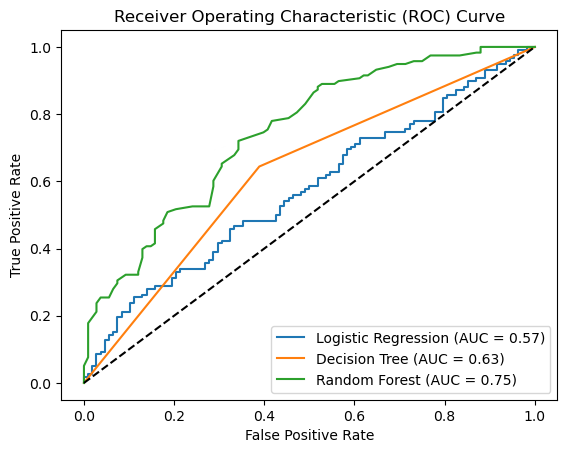

In [197]:
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, confusion_matrix, roc_curve, auc

# Train and evaluate several machine learning models
models = {'Logistic Regression': LogisticRegression(),
          'Decision Tree': DecisionTreeClassifier(),
          'Random Forest': RandomForestClassifier()}

for name, model in models.items():
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)
    acc = accuracy_score(y_test, y_pred)
    tn, fp, fn, tp = confusion_matrix(y_test, y_pred).ravel()
    
    # Calculate probabilities for ROC curve
    y_prob = model.predict_proba(X_test)[:, 1]
    fpr, tpr, thresholds = roc_curve(y_test, y_prob)
    roc_auc = auc(fpr, tpr)
    
    # Plot ROC curve
    plt.plot(fpr, tpr, label='{} (AUC = {:.2f})'.format(name, roc_auc))
    
    # Print evaluation metrics
    print(name)
    print('Accuracy:', acc)
    print('Confusion matrix:')
    print('TN:', tn, 'FP:', fp)
    print('FN:', fn, 'TP:', tp)
    print('\n')

# Set plot labels and legend
plt.plot([0, 1], [0, 1], 'k--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.legend(loc='lower right')
plt.show()


#### Using cross validation

In [198]:
from sklearn.model_selection import  cross_val_score
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score, precision_score, recall_score

# define models to evaluate
models = [('Logistic Regression', LogisticRegression()),
          ('Random Forest', RandomForestClassifier()),
          ('SVM', SVC())]

# evaluate each model using 5-fold cross-validation
for name, model in models:
    scores = cross_val_score(model, X_train, y_train, cv=20)
    print(f'{name}:')
    print(f'  Accuracy: {scores.mean()}')
    print(f'  Precision: {cross_val_score(model, X_train, y_train, cv=5, scoring="precision_macro").mean()}')
    print(f'  Recall: {cross_val_score(model, X_train, y_train, cv=5, scoring="recall_macro").mean()}')


Logistic Regression:
  Accuracy: 0.5328260869565217
  Precision: 0.5271831527509953
  Recall: 0.5271306471306471
Random Forest:
  Accuracy: 0.6644202898550724
  Precision: 0.6332816074078965
  Recall: 0.6368620268620269
SVM:
  Accuracy: 0.506159420289855
  Precision: 0.49618556306262845
  Recall: 0.49452991452991457


#### Random forest classifier with cross validation

In [199]:
# Import the required libraries
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score


# Initialize the Random Forest classifier
rf = RandomForestClassifier(n_estimators=200, random_state=42)

# Fit the model on the training data
rf.fit(X_train, y_train)

# Make predictions on the test set
y_pred = rf.predict(X_test)

# Calculate evaluation metrics
score = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred)
recall = recall_score(y_test, y_pred)
f1 = f1_score(y_test, y_pred)

# Use cross-validation to get a more accurate estimate of the model's performance
cv_scores = cross_val_score(rf, X, y, cv=7)

print("Accuracy score:", score)
print("Precision score:", precision)
print("Recall score:", recall)
print("F1 score:", f1)
print("Cross-validation scores:", cv_scores)


Accuracy score: 0.7035398230088495
Precision score: 0.7297297297297297
Recall score: 0.6864406779661016
F1 score: 0.7074235807860261
Cross-validation scores: [0.64814815 0.59876543 0.61490683 0.64596273 0.63975155 0.54658385
 0.53416149]


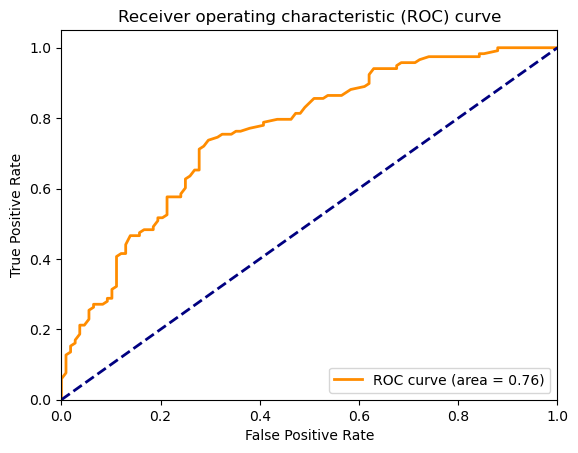

In [200]:
from sklearn.metrics import roc_curve, auc
import matplotlib.pyplot as plt

# Get the predicted probabilities for the test data
y_pred_proba = rf.predict_proba(X_test)[:,1]

# Compute the false positive rate and true positive rate at different thresholds
fpr, tpr, thresholds = roc_curve(y_test, y_pred_proba)

# Compute the area under the curve (AUC)
roc_auc = auc(fpr, tpr)

# Plot the ROC curve
plt.plot(fpr, tpr, color='darkorange', lw=2, label=f'ROC curve (area = {roc_auc:.2f})')
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver operating characteristic (ROC) curve')
plt.legend(loc="lower right")
plt.show()

In [201]:
# Import the required libraries
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score

# Initialize the Gradient Boosting classifier
gb = GradientBoostingClassifier(n_estimators=500, random_state=42)

# Fit the model on the training data
gb.fit(X_train, y_train)

# Make predictions on the test set
y_pred = gb.predict(X_test)

# Calculate evaluation metrics
score = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred)
recall = recall_score(y_test, y_pred)
f1 = f1_score(y_test, y_pred)

# Use cross-validation to get a more accurate estimate of the model's performance
cv_scores = cross_val_score(gb, X, y, cv=7)

print("Accuracy score:", score)
print("Precision score:", precision)
print("Recall score:", recall)
print("F1 score:", f1)
print("Cross-validation scores:", cv_scores)

Accuracy score: 0.6814159292035398
Precision score: 0.7129629629629629
Recall score: 0.652542372881356
F1 score: 0.6814159292035399
Cross-validation scores: [0.65432099 0.63580247 0.62111801 0.60869565 0.65217391 0.55279503
 0.55279503]
